Summer clothes

In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import datetime

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import datetime as dt
import missingno as msno

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)



#Word Cloud
from PIL import Image
import requests
from io import BytesIO
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from textblob import TextBlob
from pycaret.regression import *

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
# Dataset Load
data = pd.read_csv("E:/github/summer_clothes/summer_clothes.csv")
# To display first five rows
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [3]:
#drop merchant_title
data.drop(['merchant_title', 'merchant_info_subtitle','title'], axis = 1, inplace = True)
print("Columns drop successfully...")

Columns drop successfully...


Prodcut with highest sales irrespective of price: 

title_orig        2018 New Fashion Women's Tops Sexy Strappy Sle...
price                                                           5.0
retail_price                                                     25
currency_buyer                                                  EUR
units_sold                                                   100000
Name: 17, dtype: object




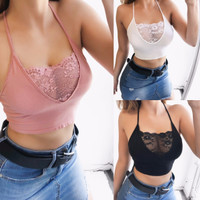

In [4]:
#MOST SOLD PRODUCTS 
most_sold_product = data['units_sold'].idxmax()
print("Prodcut with highest sales irrespective of price: \n")
print(data.iloc[most_sold_product].head())
print('\n')
response1 = requests.get(data[data['units_sold'] == 100000].product_picture.tolist()[0]) 

#printing the thumbnail of that prodcuts
Image.open(BytesIO(response1.content))

title_orig        5 Color Plus Size Summer New Women Fashion Lad...
price                                                           9.0
retail_price                                                      9
currency_buyer                                                  EUR
units_sold                                                    20000
Name: 18, dtype: object




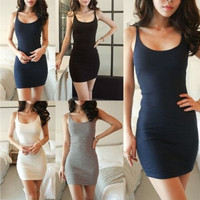

In [5]:
#most_sold_product = data['units_sold'].idxmax()
#print("Prodcut with highest sales irrespective of price: \n")
print(data.iloc[18].head())
print('\n')
response2 = requests.get(data[data['units_sold'] == 100000].product_picture.tolist()[1]) 
Image.open(BytesIO(response2.content))

title_orig        S~5XL Zipper Vest Tee New V-neck Sleeveless Pl...
price                                                           7.0
retail_price                                                      7
currency_buyer                                                  EUR
units_sold                                                     1000
Name: 19, dtype: object




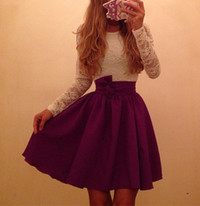

In [6]:
print(data.iloc[19].head())
print('\n')
#print("Prodcut with highest sales irrespective of price: \n")
#print(data.iloc[most_sold_product].head())
#print('\n')
response3 = requests.get(data[data['units_sold'] == 100000].product_picture.tolist()[2])
Image.open(BytesIO(response3.content))

In [7]:
# Gender Collection (Male and Female)
Total_male = round(data.title_orig.str.count("Men").sum()/len(data)*100, 3)
Total_female = round(data.title_orig.str.count("Women").sum()/len(data)*100, 3) 

fig = go.Figure()
fig.add_trace(go.Indicator(mode = "number+delta",
                             value = Total_male,
                             title = {"text": "Men Collection in %",
                                      "font" : {'color': 'rgb(58, 171, 163)', 'size': 25, 'family': 'Raleway'}},
                             number = {'font': {'color': 'rgb(58, 171, 163)', 'size': 25, 'family': 'Raleway'}},
                             domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(mode = "number+delta",
                             value = Total_female,
                             title = {"text": "Women Collection in %",
                                      "font" : {'color': 'rgb(0, 0, 0)', 'size': 35, 'family': 'Raleway'}},
                             number = {'font': {'color': 'rgb(0, 0, 0)', 'size': 35, 'family': 'Raleway'}},
                             domain = {'row': 0, 'column': 1}))
fig.update_layout(grid = {'rows': 1, 'columns': 2, 'pattern': 'independent'})
fig.show()

Text(0.5, 1.0, 'Retail Price Distribution')

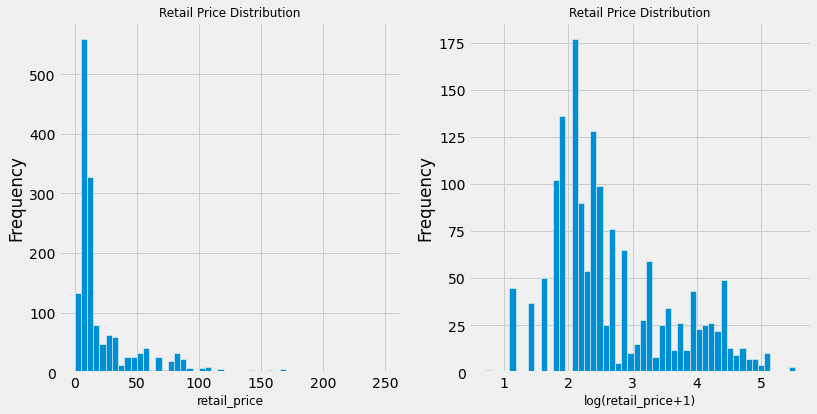

In [8]:
#RETAIL PRICE #FINAL PRICE- CHARGED TO CUSTOMER
plt.subplot(1, 2, 1)
(data['retail_price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('retail_price', fontsize=12)
plt.title('Retail Price Distribution', fontsize=12)
plt.subplot(1, 2, 2)
np.log(data['retail_price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(retail_price+1)', fontsize=12)
plt.title('Retail Price Distribution', fontsize=12)

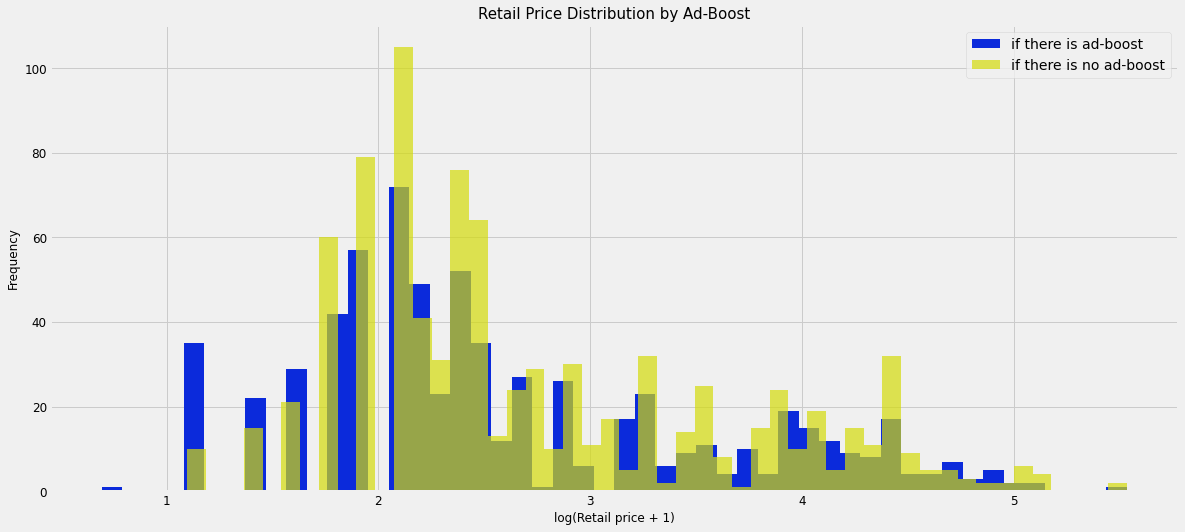

The average price is EUR 22.06 if there is ad-boost
The average price is EUR 24.23 if there is no ad-boost


In [9]:
#IS THERE ANY RELATION BETWEEN REATIL PRICE AND AD_BOOST
#uses_ad_boosts

ad_boost_by_buyer_no = data.loc[data['uses_ad_boosts'] == 0, 'retail_price']
ad_boost_by_seller_yes = data.loc[data['uses_ad_boosts'] == 1, 'retail_price']
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(np.log(ad_boost_by_seller_yes+1), color='#0b2adb', alpha=1.0, bins=50,
       label='if there is ad-boost')
ax.hist(np.log(ad_boost_by_buyer_no+1), color='#d4db0b', alpha=0.7, bins=50,
       label='if there is no ad-boost')
plt.xlabel('log(Retail price + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Retail Price Distribution by Ad-Boost', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()
print('The average price is EUR {}'.format(round(ad_boost_by_seller_yes.mean(), 2)), 'if there is ad-boost');
print('The average price is EUR {}'.format(round(ad_boost_by_buyer_no.mean(), 2)), 'if there is no ad-boost')

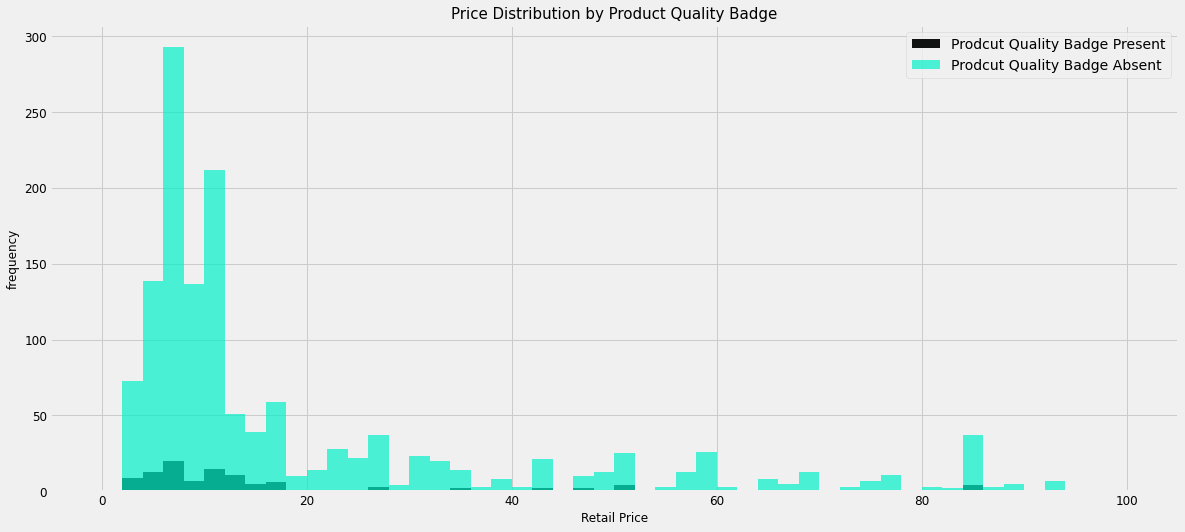

In [10]:
#badge_product_quality
#Relationship between Product Quality and Price

product_quality_no = data.loc[data['badge_product_quality'] == 0, 'retail_price']
product_quality_yes = data.loc[data['badge_product_quality'] == 1, 'retail_price']
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(product_quality_yes, color='#111212', alpha=1.0, bins=50, range = [0, 100],
       label='Prodcut Quality Badge Present')
ax.hist(product_quality_no, color='#02f0c8', alpha=0.7, bins=50, range = [0, 100],
       label='Prodcut Quality Badge Absent')
plt.xlabel('Retail Price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Product Quality Badge', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [11]:
#Successful Products(we will consider the low limit where we can say that product on that website is successful or not. Putting that limit to 1000.)
data['success_product'] = np.nan
for i in data.index:
    if data['units_sold'].loc[i] >= 1000:
        data['success_product'].loc[i] = 1
    else:
        data['success_product'].loc[i] = 0
        
#FIND AVG RATING FOR SUCCESSFUL PRODUCT AND UNSUCCESSFUL PRODUCT
success_rating = float("{:.3f}".format(data[data["success_product"] == 1.0].rating.mean()))
unsuccess_rating = float("{:.3f}".format(data[data["success_product"] == 0.0].rating.mean()))

print("The average rating of the successful product is: "+ str(success_rating) + '\n')
print("The average rating of the unsuccessful product is: "+ str(unsuccess_rating))

The average rating of the successful product is: 3.835

The average rating of the unsuccessful product is: 3.801


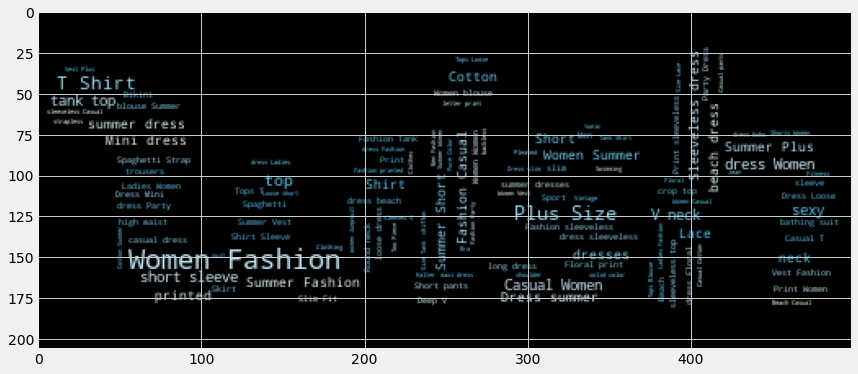

In [12]:
#WORD CLOUD OF TAGS
tags_total = data['tags'].dropna().tolist()
tags_final=(" ").join(tags_total)
response = requests.get('https://www.incrediblelab.com/wp-content/uploads/2017/04/wish-logo.jpg')
char_mask = np.array(Image.open(BytesIO(response.content)))
image_colors = ImageColorGenerator(char_mask)
plt.figure(figsize = (13,7))

wc = WordCloud(background_color="Black", max_words=200,
               width=400, height=400, mask=char_mask, random_state=1).generate(tags_final)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))

REGRESSION

In [13]:
#take few columns and made new df
df=data[['title_orig','tags', 'retail_price','units_sold', 'price', 'rating', 'rating_count',
         'rating_five_count', 'rating_one_count', 'rating_three_count', 'rating_two_count', 'rating_four_count',
         'badge_local_product', 'product_variation_inventory', 'shipping_option_price', 
         'merchant_rating_count', 'merchant_rating']]
df.head(3)

,title_orig,tags,retail_price,units_sold,price,rating,rating_count,rating_five_count,rating_one_count,rating_three_count,rating_two_count,rating_four_count,badge_local_product,product_variation_inventory,shipping_option_price,merchant_rating_count,merchant_rating
0,2020 Summer Vintage Flamingo Print Pajamas Se...,"Summer,Fashion,womenunderwearsuit,printedpajam...",14,100,16.0,3.76,54,26.0,9.0,10.0,1.0,8.0,0,50,4,568,4.128521
1,Women's Casual Summer Sleeveless Sexy Mini Dress,"Mini,womens dresses,Summer,Patchwork,fashion d...",22,20000,8.0,3.45,6135,2269.0,1077.0,1118.0,644.0,1027.0,0,50,2,17752,3.899673
2,2020 New Arrival Women Spring and Summer Beach...,"Summer,cardigan,women beachwear,chiffon,Sexy w...",43,100,8.0,3.57,14,5.0,3.0,2.0,0.0,4.0,0,1,3,295,3.989831


In [14]:
# units_sold -> Y Variable
#pip install pycaret
from pycaret.regression import *

In [15]:
df['units_sold'] = df['units_sold'].astype('float')

In [16]:
exp_reg = setup(df, target = 'units_sold', silent = True)
imputation_type='iterative'

,Description,Value
0,session_id,1073
1,Target,units_sold
2,Original Data,"(1573, 17)"
3,Missing Values,True
4,Numeric Features,12
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1101, 982)"


In [17]:
best_model = compare_models(sort = 'MAPE', exclude= ['lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1280.5346,14039982.5808,3535.2107,0.8479,0.7095,0.6801,1.9690
dt,Decision Tree Regressor,1535.0232,28876588.1047,5041.5215,0.6848,0.8506,0.6986,0.0630
rf,Random Forest Regressor,1370.7251,16328508.9056,3799.6363,0.8272,0.7225,0.7755,1.4690
huber,Huber Regressor,1676.2913,18287760.5700,4114.7393,0.7890,0.8765,1.5580,1.4490
par,Passive Aggressive Regressor,2001.0197,21194061.9301,4476.7966,0.7308,1.1445,3.5440,0.0790
omp,Orthogonal Matching Pursuit,1691.3952,16522262.3550,3948.8244,0.7977,1.1587,3.6794,0.0750
gbr,Gradient Boosting Regressor,1503.8409,16200402.7722,3728.0136,0.8227,1.1303,4.2066,1.0970
catboost,CatBoost Regressor,1437.7112,12439957.1690,3326.5945,0.8668,1.0845,4.2221,6.3570
lasso,Lasso Regression,1596.8992,17265089.4500,3960.7105,0.8044,1.0995,4.3219,0.2850
br,Bayesian Ridge,1912.0776,17360573.0364,3991.2645,0.7923,1.5849,6.2946,1.0580


In [18]:
#Choosing Best Model - K=3-Cross validation, et- Extra Trees Regressor
rf = create_model('et', fold = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1139.8531,12056248.6541,3472.2109,0.8752,0.7404,0.7326
1,1561.6137,24049118.0406,4903.9900,0.8115,0.6560,0.6346
2,1316.7181,11861514.5010,3444.0550,0.8118,0.7691,0.7545
Mean,1339.3949,15988960.3986,3940.0853,0.8328,0.7218,0.7072
SD,172.9281,5699946.5645,681.6805,0.0300,0.0480,0.0522


In [19]:
#Plotting the model (Hyper parameter optimization)
# We are selecting best optimized parameters of extra trees regresser on the basis of average MAPE(mean absolute percentage error) 
tuned_dt = tune_model(rf, optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2087.1883,34697524.7130,5890.4605,0.7891,0.9123,1.4495
1,1806.8252,23282404.8669,4825.1844,0.8039,0.9949,2.7864
2,935.5010,4197049.6111,2048.6702,0.8401,0.9197,2.8871
3,1763.9836,15344131.1937,3917.1586,0.8354,0.7412,0.9777
4,1321.3793,6346167.6192,2519.1601,0.8854,0.9843,2.5966
5,1693.1443,31325882.5271,5596.9530,0.8066,0.7647,0.9696
6,1710.0578,32047830.7940,5661.0804,0.7579,0.8743,1.3952
7,1358.8419,5176271.1552,2275.1420,0.7790,0.8919,1.3710
8,1532.7412,9522271.4153,3085.8178,0.7975,0.8265,1.4681
9,1888.2140,28946070.4961,5380.1552,0.7796,0.8959,1.4222


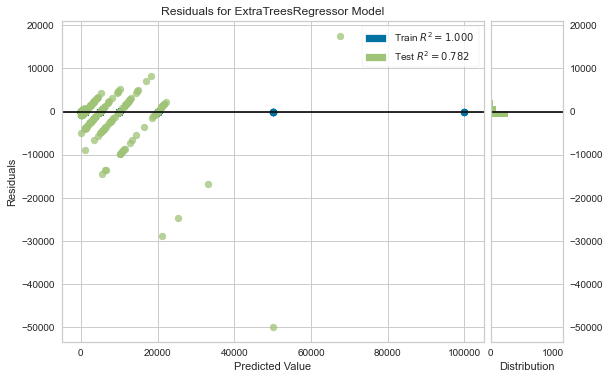

In [20]:
plot_model(rf, plot = 'residuals')